In [1]:
%matplotlib inline
import dnn
import dnn.functional as F
from dnn.data import load_data_mnist
import dnn.nn as nn
import dnn.optim as optim
from dnn.train import train
import time
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy.linalg

In [2]:
class MLP(nn.Module):
    def __init__(self, num_inputs, num_hiddens, num_outputs, activation='relu'):
        super(MLP, self).__init__()
        if activation == 'relu':
            self.layers = [F.Linear(num_inputs, num_hiddens), F.ReLU(), F.Linear(num_hiddens, num_outputs), F.Softmax()]
        elif activation == 'sigmoid':
            self.layers = [F.Linear(num_inputs, num_hiddens), F.Sigmoid(), F.Linear(num_hiddens, num_outputs), F.Softmax()]

In [3]:
class PCA():
    def __init__(self):
        self.arr = None
        self.w = None
    
    def fit(self, X):
        Sigma = np.cov(X, rowvar=True)
        ret = scipy.linalg.schur(Sigma, sort=lambda x: abs(x))
        self.w, self.arr = ret[0], ret[1]
        self.w = np.diag(self.w)
    
    def transform(self, X, n):
        return np.dot(self.arr[:, 1:min(len(self.w), n+1)].T, X)
    
    def fit_transform(self, X, n):
        self.fit(X)
        return self.transform(X, n)

In [4]:
with open('./model/mnist_hidden_256.pkl','rb') as f:
    net = pickle.load(f)

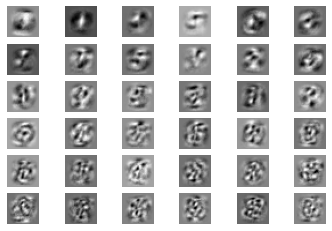

In [5]:
pca = PCA()
# net.layers[0].weight.transpose().shape
weight_fc1 = pca.fit_transform(net.layers[0].weight.transpose(), 36).reshape(36, 28, 28)
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.imshow(weight_fc1[i])
    plt.axis('off')
    plt.gray()

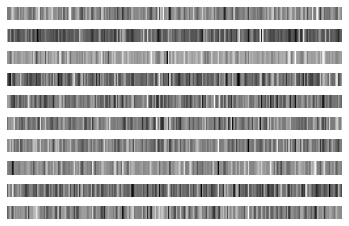

In [19]:
weight_fc2 = net.layers[2].weight.transpose().reshape(10, -1)
for i in range(10):
    plt.subplot(10, 1, i+1)
    plt.imshow(np.tile(weight_fc2[i], (10, 1)))
    plt.axis('off')
    plt.gray()